<a href="https://colab.research.google.com/github/ArpanChaudhary/Python/blob/main/Admission_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Admission_Prediction.csv")

df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [3]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [5]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [6]:
df.dtypes

Serial No.             int64
GRE Score            float64
TOEFL Score          float64
University Rating    float64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
df['GRE Score'].unique()

array([337., 324.,  nan, 322., 314., 330., 321., 308., 302., 323., 325.,
       327., 307., 311., 317., 319., 318., 303., 312., 328., 336., 340.,
       298., 295., 310., 300., 338., 331., 320., 304., 316., 313., 332.,
       326., 329., 339., 334., 309., 315., 301., 296., 294., 299., 306.,
       305., 290., 335., 333., 297., 293.])

In [8]:
df['GRE Score'] = df['GRE Score'].fillna(df['GRE Score'].mean())

In [9]:
df['TOEFL Score'].unique()

array([118., 107., 104., 110., 103., 115., 109., 101., 102., 108., 106.,
       111., 112., 105., 114., 116., 119., 120.,  98.,  93.,  99.,  97.,
       117., 113., 100.,  nan,  95.,  96.,  94.,  92.])

In [10]:
df['TOEFL Score'] = df['TOEFL Score'].fillna(df['TOEFL Score'].mean())

In [11]:
df['TOEFL Score'].unique()

array([118.       , 107.       , 104.       , 110.       , 103.       ,
       115.       , 109.       , 101.       , 102.       , 108.       ,
       106.       , 111.       , 112.       , 105.       , 114.       ,
       116.       , 119.       , 120.       ,  98.       ,  93.       ,
        99.       ,  97.       , 117.       , 113.       , 100.       ,
       107.1877551,  95.       ,  96.       ,  94.       ,  92.       ])

In [12]:
df['University Rating'].unique()

array([ 4.,  3.,  2.,  5., nan,  1.])

In [13]:
df['University Rating'].mode()

0    3.0
Name: University Rating, dtype: float64

In [14]:
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mode()[0])

In [15]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

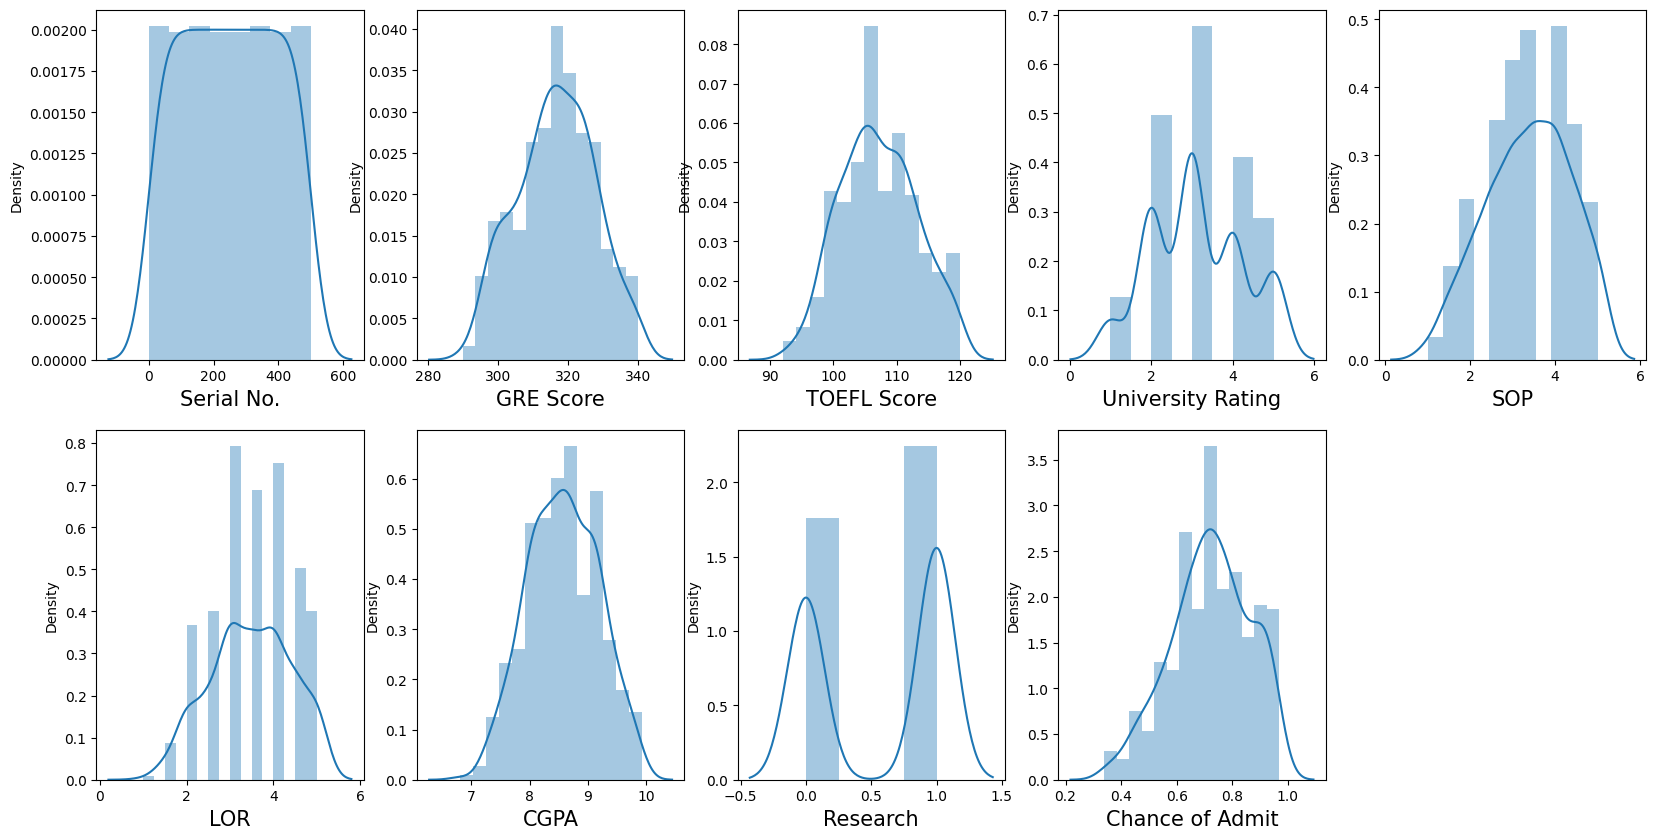

In [17]:
plt.figure(figsize=(20,10))
plotnumber=1

for column in df:
  if plotnumber <= 10:
    ax = plt.subplot(2,5,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=15)
  plotnumber+=1

plt.show()

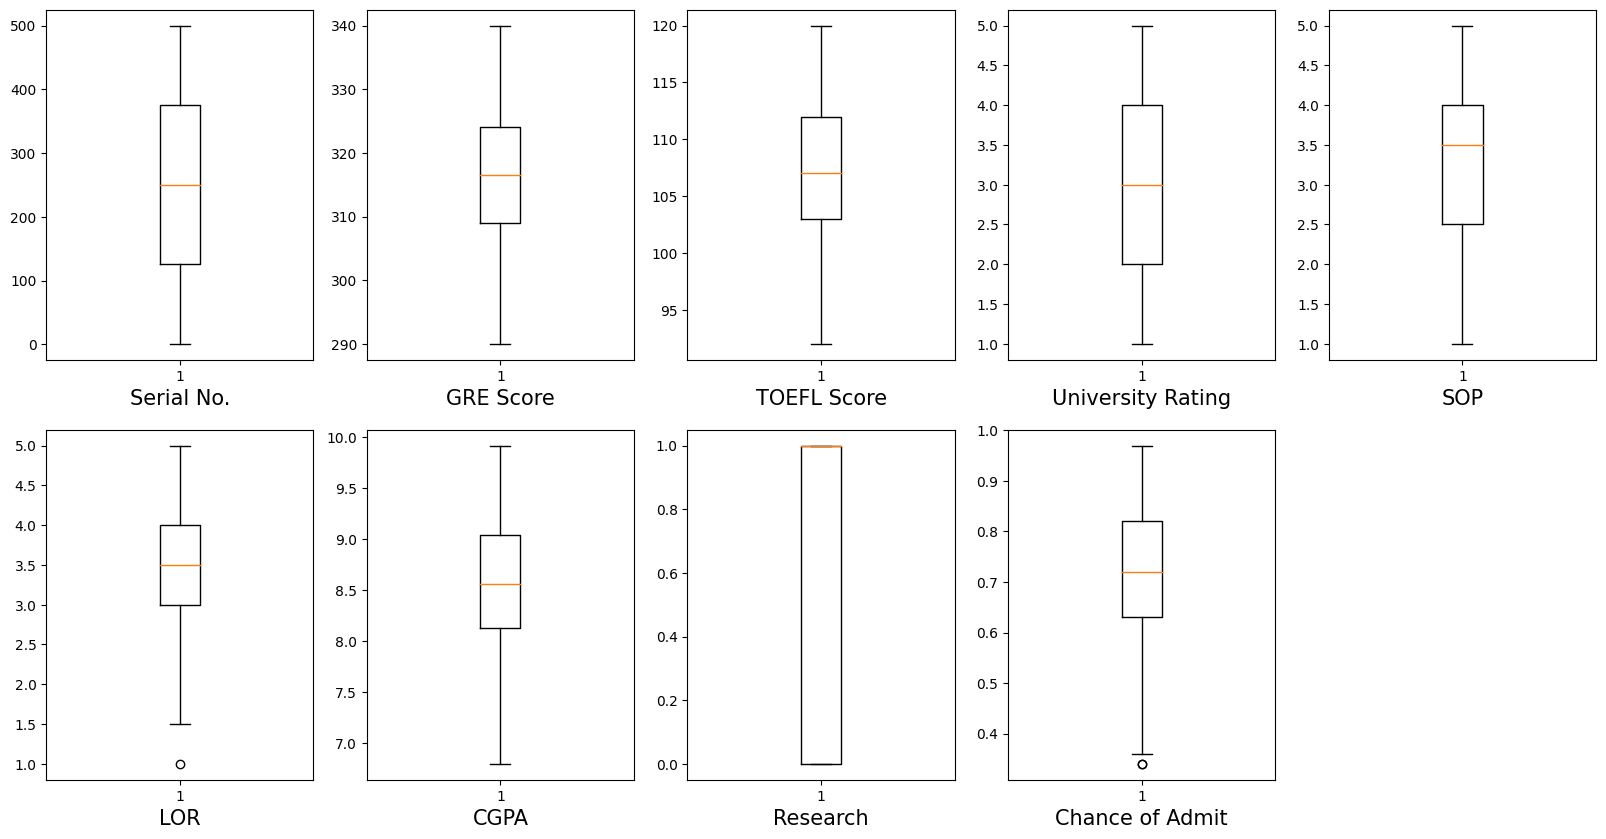

In [18]:
plt.figure(figsize=(20,10))
plotnumber=1

for column in df:
  if plotnumber <= 10:
    ax = plt.subplot(2,5,plotnumber)
    plt.boxplot(df[column])
    plt.xlabel(column,fontsize=15)
  plotnumber+=1

plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [20]:
x = df.drop(columns='Chance of Admit')

y = df['Chance of Admit']

In [21]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

x_scaled

array([[-1.72859016e+00,  1.84274116e+00,  1.78854223e+00, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [-1.72166195e+00,  6.70814288e-01, -3.10581135e-02, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [-1.71473373e+00,  5.12433309e-15, -5.27312752e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.71473373e+00,  1.21170361e+00,  2.11937866e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [ 1.72166195e+00, -4.10964364e-01, -6.92730965e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 1.72859016e+00,  9.41258951e-01,  9.61451165e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=15)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [25]:
lr_pred = lr.predict(x_test)

In [26]:
lr.score(x_train,y_train)

0.8261077294579625

In [27]:
lr.score(x_test,y_test)

0.8621511368969733

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [29]:
r2_score(y_test,lr_pred)

0.8621511368969733

In [30]:
mean_absolute_error(y_test,lr_pred)

0.04283173601046608

In [31]:
mean_squared_error(y_test,lr_pred)

0.003738216102708567

In [32]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV

In [33]:
lassocv = LassoCV(alphas=None,max_iter=100)

lassocv.fit(x_train,y_train)

alpha = lassocv.alpha_

lassoreg = Lasso(alpha)

lassoreg.fit(x_train,y_train)

Lasso(alpha=0.0005313912381579669)

In [34]:
lassoreg.score(x_train,y_train)

0.8260660329368213

In [35]:
lassoreg.score(x_test,y_test)

0.8613016215650579